In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [4]:
#drop the feature hotel
df=df.drop(['hotel'],axis=1)

In [5]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


# Clean Dataset

In [6]:
import re
import string
def text_cleaning(text):
    
    text = text.lower()         
    text = re.sub('\[.*?\]', '', text)  
    text = re.sub("\\W"," ",text)   
    text = re.sub('https?://\S+|www\.\S+', '', text)  
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [7]:
df['text']=df['text'].apply(text_cleaning)

In [8]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...


In [9]:
df['complete_text']=df['source'] +df['text']

In [10]:
x=df['complete_text']
y=df['deceptive']

In [11]:
x

0       TripAdvisorwe stayed for a one night getaway w...
1       TripAdvisortriple a rate with upgrade to view ...
2       TripAdvisorthis comes a little late as i m fin...
3       TripAdvisorthe omni chicago really delivers on...
4       TripAdvisori asked for a high floor away from ...
                              ...                        
1595    MTurkproblems started when i booked the interc...
1596    MTurkthe amalfi hotel has a beautiful website ...
1597    MTurkthe intercontinental chicago magnificent ...
1598    MTurkthe palmer house hilton  while it looks g...
1599    MTurkas a former chicagoan  i m appalled at th...
Name: complete_text, Length: 1600, dtype: object

In [12]:
y

0        truthful
1        truthful
2        truthful
3        truthful
4        truthful
          ...    
1595    deceptive
1596    deceptive
1597    deceptive
1598    deceptive
1599    deceptive
Name: deceptive, Length: 1600, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=LabelEncoder()
y=le.fit_transform(y)

In [14]:
print(x.shape)
print(y.shape)

(1600,)
(1600,)


# Splitting data into training and testing 

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2) 

In [16]:
x_test

1073    Webi never write these reviews  but felt that ...
326     TripAdvisorwe stayed at the palmer house hilto...
1557    MTurkmy experience at the amalfi hotel in chic...
918     Webthis review has two parts     i advise read...
974     Webwe chose to stay at a small hotel because w...
                              ...                        
583     MTurk classy   decent  and  serene   these wor...
1       TripAdvisortriple a rate with upgrade to view ...
1566    MTurkthe pictures on this website sure are dec...
554     MTurki just spent a week at the millennium kni...
1323    MTurki had wanted to stay in this hotel since ...
Name: complete_text, Length: 320, dtype: object

In [17]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))

In [19]:
x_train=cv.fit_transform(x_train)

In [20]:
import matplotlib.pyplot as plt

In [21]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, cmap=cmap)
    
    plt.title(title)
    
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)   

    threshold = cm.max() / 2. 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")


    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')

# Random Forest Algorithm

In [22]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=1000, random_state=0) 

In [23]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.922


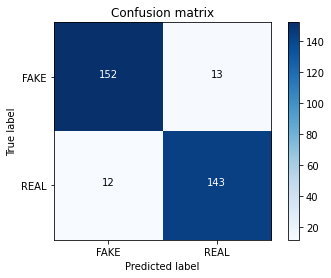

In [24]:
RF.fit(x_train, y_train) 
 
pred_1=RF.predict(cv.transform(x_test))

score_1=metrics.accuracy_score(y_test,pred_1)
print("accuracy:   %0.3f" % score_1)

cm = metrics.confusion_matrix(y_test, pred_1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
RF_accuracy = round(score_1*100,2)

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

accuracy:   0.863 


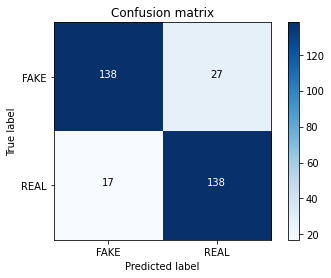

In [26]:
DT.fit(x_train,y_train) 
pred_2 = DT.predict(cv.transform(x_test))
score_2 = metrics.accuracy_score(y_test, pred_2)
print("accuracy:   %0.3f " % score_2)
cm = metrics.confusion_matrix(y_test, pred_2)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
DT_accuracy = round(score_2*100,2)

# Support Vector Machine

In [27]:
from sklearn.svm import SVC

In [28]:
svm=SVC()

accuracy:   0.872 


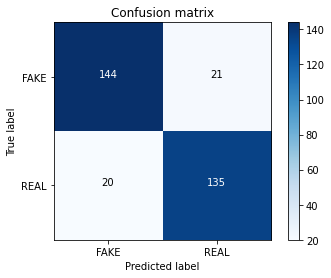

In [29]:
svm.fit(x_train,y_train)
pred_3 = svm.predict(cv.transform(x_test))
score_3 = metrics.accuracy_score(y_test, pred_3)
print("accuracy:   %0.3f " % score_3)
cm = metrics.confusion_matrix(y_test, pred_3)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
SVM_accuracy = round(score_3*100,2)

# Compare accuracy

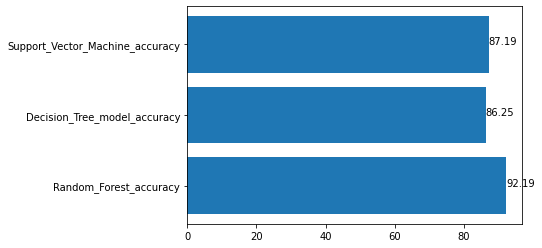

In [30]:
import matplotlib.pyplot as plt

x = ["Random_Forest_accuracy", "Decision_Tree_model_accuracy", "Support_Vector_Machine_accuracy"]
y =  [RF_accuracy, DT_accuracy, SVM_accuracy]
plt.barh(x, y) 
for index, value in enumerate(y):
    plt.text(value, index, str(value))